Ideas:
1. Overlay important locations and see how the road network there is
2. Remove a road near it and see how the path length increases

In [97]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option("display.max_rows", None)


In [68]:
nodes_path = "./Data/node_location.txt"  
node_data = pd.read_csv(nodes_path, sep=" ", header=None, names=["node_id", "long", "lat"])

edges_path = "./Data/edge_data.txt"  
edges_data = pd.read_csv(edges_path, sep=" ", header=None, names=["edge_id", "start_node", "end_node", "l2_dist"])

poi_path = "./Data/points_of_interest.txt"
poi_data = pd.read_csv(poi_path, sep=" ", header=None, names=["cat", "long", "lat"])

G = nx.Graph()

In [69]:
print("Graph statistics : ")
print(f"Number of nodes : {len(node_data)}")
print(f"Number of edges : {len(edges_data)}")

Graph statistics : 
Number of nodes : 21048
Number of edges : 21693


In [70]:
# Add nodes with positions
pos = {}  # Dictionary to store positions for visualization
ctr=0
for _, row in node_data.iterrows():
    ctr+=1
    node_id = row["node_id"]
    long, lat = row["long"], row["lat"]
    G.add_node(node_id, pos=(long, lat))  # Adding nodes with position attributes
    pos[node_id] = (long, lat)
    
    if ctr % 500 == 0:
        print(ctr)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000


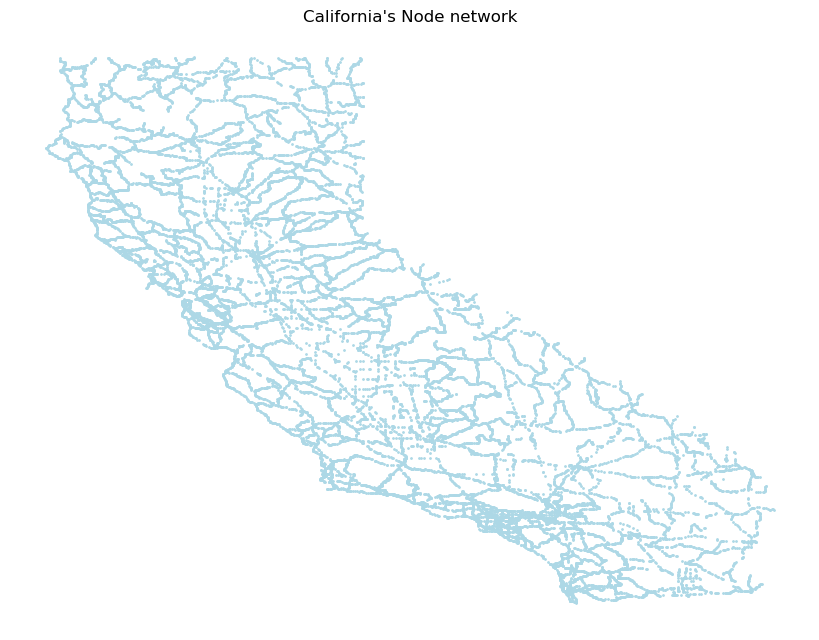

In [71]:
# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=False, node_size=1, node_color="lightblue", edge_color="gray")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California's Node network")
plt.show()


In [72]:
ctr=0
for _, row in edges_data.iterrows():
    ctr+=1
    G.add_edge(row["start_node"], row["end_node"], weight=row["l2_dist"])
    
    if ctr%500 == 0:
        print(ctr)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500


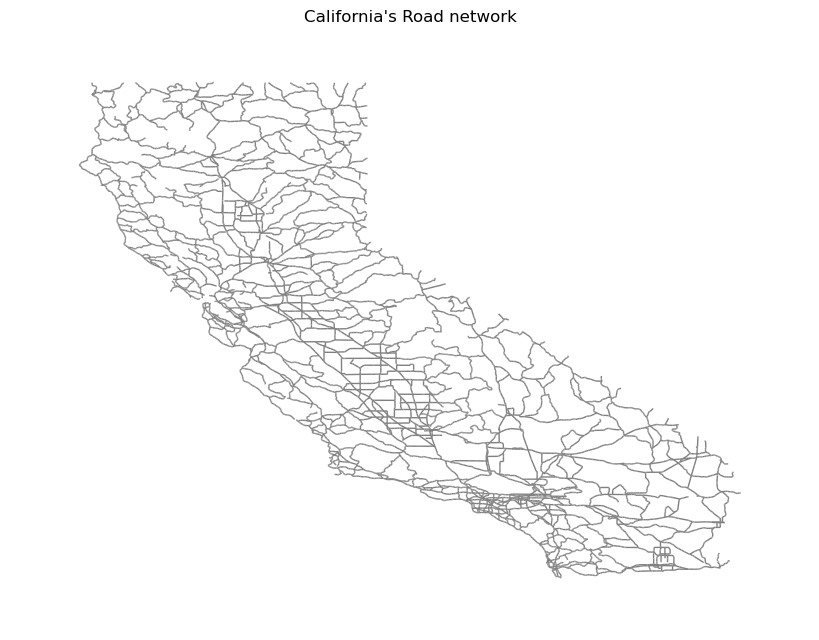

In [74]:
# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=False, node_size=0, node_color="lightblue", edge_color="gray", width=1.0)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California's Road network")
plt.show()

In [75]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality done")

# Compute betweenness centrality
# betweenness_centrality = nx.betweenness_centrality(G, weight="weight")
# print("Betweenness Centrality done")

# Compute average clustering coefficient
avg_clustering = nx.average_clustering(G)
print("Clustering Coefficient done")

# Get the clustering coefficient for each node
clustering_coefficients = nx.clustering(G)
print("Individual Clustering Coefficients done")

degree_values = list(degree_centrality.values())
clustering_values = list(clustering_coefficients.values())

Degree Centrality done
Clustering Coefficient done
Individual Clustering Coefficients done


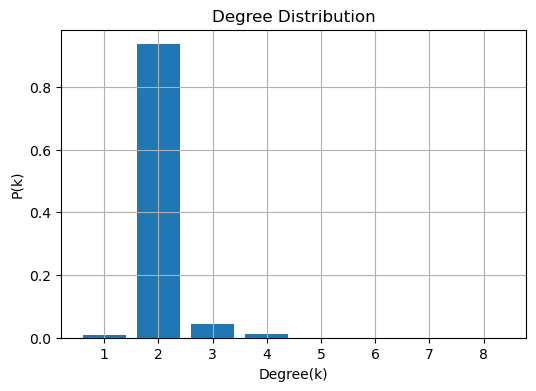

In [76]:
# Compute degree distribution
degree_sequence = [d for _, d in G.degree()]
degree_counts = np.bincount(degree_sequence)
degree_counts = degree_counts/len(G)
degrees = np.nonzero(degree_counts)[0]

# Plot degree distribution on log-log scale
plt.figure(figsize=(6, 4))
plt.bar(degrees, degree_counts[degrees], linestyle="None")
plt.xlabel("Degree(k)")
plt.ylabel("P(k)")
plt.title("Degree Distribution")
plt.grid(True)
plt.show()

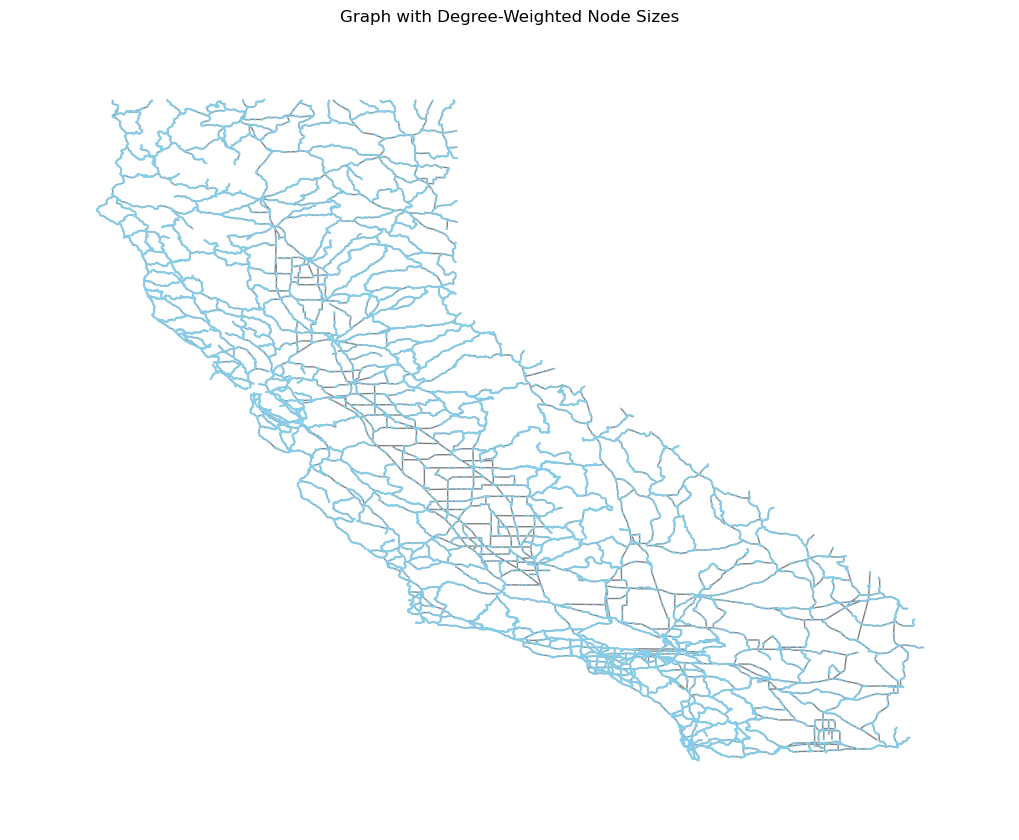

In [77]:
degree_dict = dict(G.degree())

max_degree = max(degree_dict.values())
node_sizes = [1 * degree / max_degree for degree in degree_dict.values()]  


plt.figure(figsize=(10, 8))
nx.draw(G,pos, with_labels=False, node_size=node_sizes, node_color='skyblue', edge_color='gray', width=1.0 )
plt.title("Graph with Degree-Weighted Node Sizes")
plt.show()

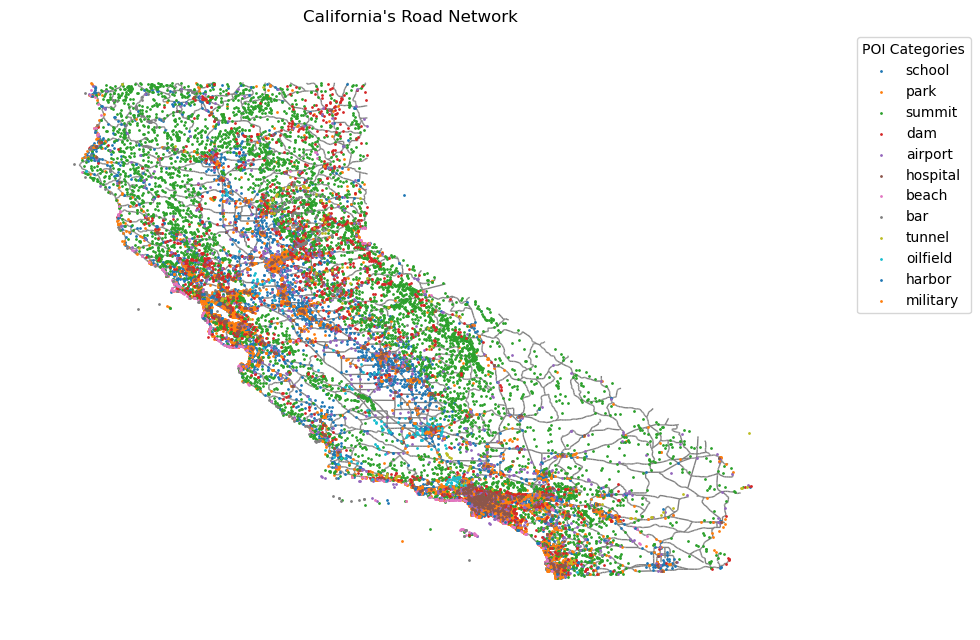

In [96]:
# Get the top 10 most frequent categories
# top_cats = poi_data["cat"].value_counts().nlargest(10).index
top_cats =  [ 'school'
             , 'park'
             ,'summit'
             ,'dam'
             ,'airport'
             ,'hospital'
             ,'beach'
             ,'bar'
             ,'tunnel'
             ,'oilfield'
             ,'harbor'
             ,'military'
]
filtered_poi = poi_data[poi_data["cat"].isin(top_cats)]
num_colors = len(top_cats)

# Assign colors to each category
palette = sns.color_palette("tab10", n_colors=num_colors)
cat_colors = {cat: palette[i] for i, cat in enumerate(top_cats)}

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=False, node_size=0, node_color="lightblue", edge_color="gray", width=1.0)

# Plot POI locations with color coding
for cat, color in cat_colors.items():
    subset = filtered_poi[filtered_poi["cat"] == cat]
    plt.scatter(subset["long"], subset["lat"], c=[color], label=cat, marker="o", s=1)
    
# Labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California's Road Network")
plt.legend(title="POI Categories", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()